In [4]:
import pandas as pd
import numpy as np
import csv 
import matplotlib.pyplot as plt
import seaborn as sns


#https://altair-viz.github.io/gallery/errorbars_with_std.html
import altair as alt
from vega_datasets import data

#defining paths
binaryRelevance = './experiment/dfTesteBinary.csv'
classifierChain = './experiment/dfTesteClassifierChain.csv'


dataBinary = pd.read_csv(binaryRelevance)
dataClassifier = pd.read_csv(classifierChain)

In [5]:
def cliffsDelta(lst1, lst2, **dull):

    """Returns delta and true if there are more than 'dull' differences"""
    if not dull:
        dull = {'small': 0.147, 'medium': 0.33, 'large': 0.474} # effect sizes from (Hess and Kromrey, 2004)
    m, n = len(lst1), len(lst2)
    lst2 = sorted(lst2)
    j = more = less = 0
    for repeats, x in runs(sorted(lst1)):
        while j <= (n - 1) and lst2[j] < x:
            j += 1
        more += j*repeats
        while j <= (n - 1) and lst2[j] == x:
            j += 1
        less += (n - j)*repeats
    d = (more - less) / (m*n)
    size = lookup_size(d, dull)
    return d, size


def lookup_size(delta: float, dull: dict) -> str:
    """
    :type delta: float
    :type dull: dict, a dictionary of small, medium, large thresholds.
    """
    delta = abs(delta)
    if delta < dull['small']:
        return 'negligible'
    if dull['small'] <= delta < dull['medium']:
        return 'small'
    if dull['medium'] <= delta < dull['large']:
        return 'medium'
    if delta >= dull['large']:
        return 'large'


def runs(lst):
    """Iterator, chunks repeated values"""
    for j, two in enumerate(lst):
        if j == 0:
            one, i = two, 0
        if one != two:
            yield j - i, one
            i = j
        one = two
    yield j - i + 1, two

In [6]:
#https://machinelearningmastery.com/effect-size-measures-in-python/
#Small Effect Size: d=0.20
#Medium Effect Size: d=0.50
#Large Effect Size: d=0.80

from numpy import mean
from numpy import var
from math import sqrt

def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = mean(d1), mean(d2)
	# calculate the effect size
	return (u1 - u2) / s



In [7]:
dataBinary

,date_time,tf-IDF,#_TopTerms,Stop_Word,Train/Test_Size,Algorithm,Accuracy_Score,Accuracy_Score_not_normalized,zero_one_loss,AUC-PR,hamming_loss_avg,Jaccard_samples,Jaccard_macro,Precision,Recall,Fmeasure_Score
0,2020-04-16 16:28:41.470791,"(1, 1)",25,Yes,0.2,RandomForest,0.071633,25,0.928367,0.489202,0.126335,0.341714,0.316901,0.571792,0.415512,0.481283
1,2020-04-16 16:28:47.758556,"(1, 1)",25,Yes,0.3,RandomForest,0.083095,29,0.916905,0.490396,0.125554,0.348908,0.321127,0.575032,0.421053,0.486141
2,2020-04-16 16:28:54.235683,"(1, 1)",25,Yes,0.4,RandomForest,0.071633,25,0.928367,0.485906,0.126856,0.335050,0.310686,0.570871,0.405355,0.474082
3,2020-04-16 16:29:00.866927,"(1, 1)",50,Yes,0.2,RandomForest,0.094556,33,0.905444,0.502058,0.123209,0.350118,0.321377,0.590250,0.413666,0.486428
4,2020-04-16 16:29:07.469366,"(1, 1)",50,Yes,0.3,RandomForest,0.088825,31,0.911175,0.505611,0.120344,0.355398,0.330920,0.605298,0.421976,0.497280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2020-04-16 18:07:31.510809,"(4, 4)",500,Yes,0.3,MLkNN,0.048711,17,0.951289,0.445009,0.119953,0.345576,0.316766,0.617052,0.394275,0.481127
296,2020-04-16 18:07:50.802936,"(4, 4)",500,Yes,0.4,MLkNN,0.048711,17,0.951289,0.445009,0.119953,0.345576,0.316766,0.617052,0.394275,0.481127
297,2020-04-16 18:08:10.918621,"(4, 4)",1000,Yes,0.2,MLkNN,0.083095,29,0.916905,0.446155,0.125423,0.382920,0.364356,0.560976,0.509695,0.534107
298,2020-04-16 18:08:31.147686,"(4, 4)",1000,Yes,0.3,MLkNN,0.083095,29,0.916905,0.446155,0.125423,0.382920,0.364356,0.560976,0.509695,0.534107


In [8]:
#source = data.population.url

alt.Chart(dataBinary,height=300,width=450).mark_boxplot(size=50).encode(
    x=alt.X('Algorithm:O',title='MultiLabel Algorithm'),
    y=alt.Y('Fmeasure_Score', title='F-measure',scale=alt.Scale(domain=(0.25, 0.75))),
    color='Algorithm'
)

alt.Chart(...)

In [9]:
dd=pd.melt(dataClassifier,id_vars=['Algorithm'],value_vars=['Precision','Recall','Fmeasure_Score'],var_name='Evaluation Metrics')

alt.Chart(dd,height=300,width=270).mark_boxplot(size=50).encode(
    x=alt.X('Algorithm', title='MultiLabel Algorithm'),
    y=alt.Y('value', title='value',scale=alt.Scale(domain=(0.15, 0.85))),
    color='Algorithm'
).facet(column='Evaluation Metrics')


alt.FacetChart(...)

In [10]:
dd=pd.melt(dataBinary,id_vars=['Algorithm'],value_vars=['Precision','Recall','Fmeasure_Score'],var_name='Evaluation Metrics')

alt.Chart(dd,height=300,width=270).mark_boxplot(size=50).encode(
    x=alt.X('Algorithm', title='MultiLabel Algorithm'),
    y=alt.Y('value', title='value',scale=alt.Scale(domain=(0.25, 0.75))),
    color='Algorithm'
).facet(column='Evaluation Metrics')


alt.FacetChart(...)

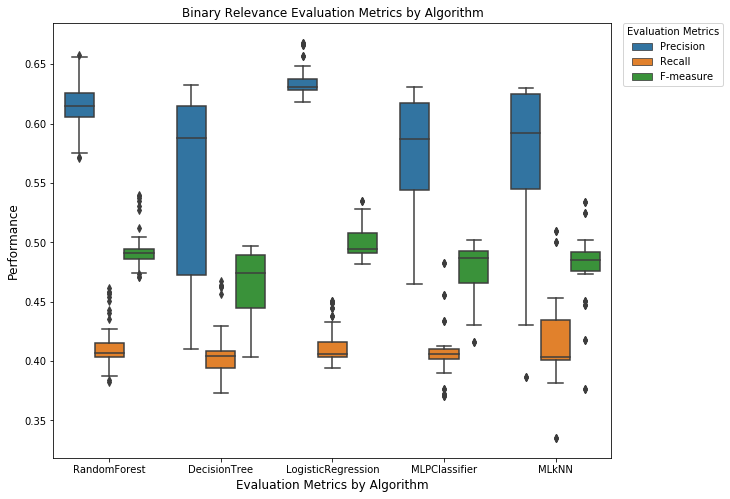

In [11]:
dd=pd.melt(dataBinary,id_vars=['Algorithm'],value_vars=['Precision','Recall','Fmeasure_Score'],var_name='Evaluation Metrics')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='Algorithm',data=dd,hue='Evaluation Metrics')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by Algorithm",size=12)

labels=["Precision", "Recall", "F-measure"]
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Metrics",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Binary Relevance Evaluation Metrics by Algorithm", size=12)
plt.show()
#plt.savefig("grouped_boxplot_AlgorithmBinary.png")


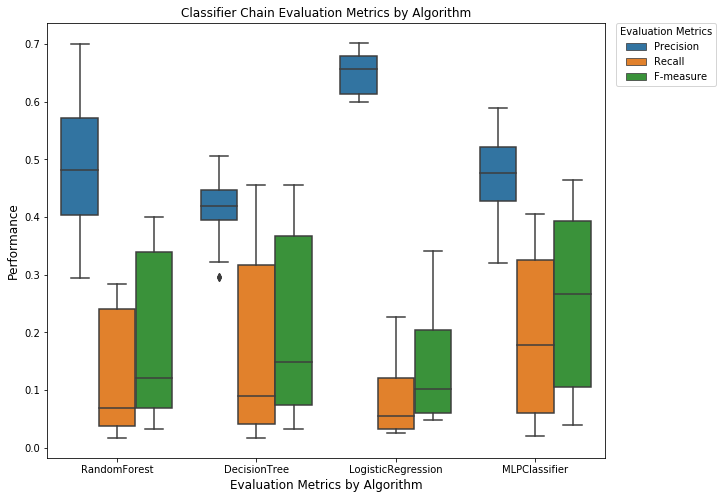

In [12]:
dd=pd.melt(dataClassifier,id_vars=['Algorithm'],value_vars=['Precision','Recall','Fmeasure_Score'],var_name='Evaluation Metrics')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='Algorithm',data=dd,hue='Evaluation Metrics')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by Algorithm",size=12)

labels=["Precision", "Recall", "F-measure"]
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Metrics",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Classifier Chain Evaluation Metrics by Algorithm", size=12)
plt.show()

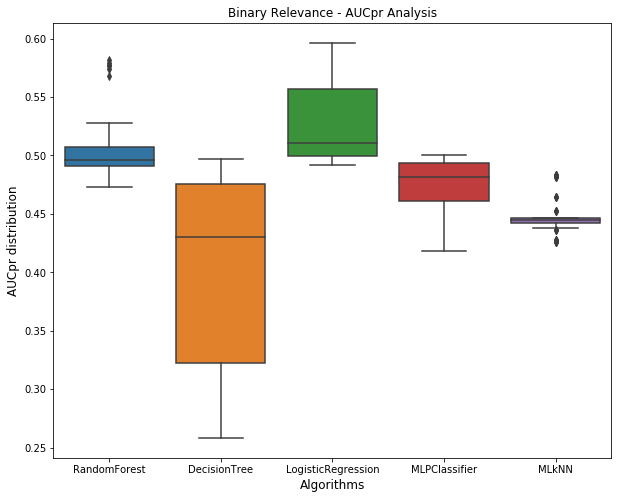

In [13]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='AUC-PR',x='Algorithm',data=dataBinary)
plt.ylabel("AUCpr distribution", size=12)
plt.xlabel("Algorithms",size=12)
plt.title("Binary Relevance - AUCpr Analysis", size=12)
plt.show()


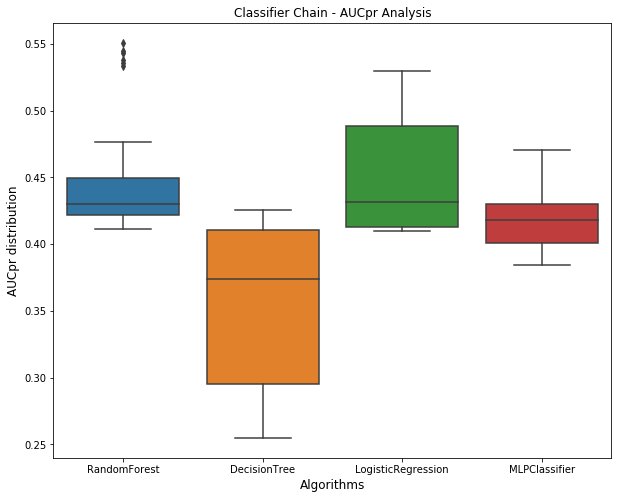

In [14]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='AUC-PR',x='Algorithm',data=dataClassifier)
plt.ylabel("AUCpr distribution", size=12)
plt.xlabel("Algorithms",size=12)
plt.title("Classifier Chain - AUCpr Analysis", size=12)
plt.show()

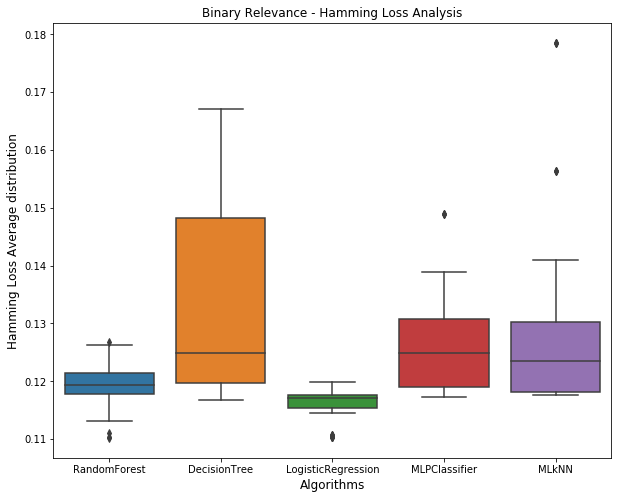

In [15]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='hamming_loss_avg',x='Algorithm',data=dataBinary)
plt.ylabel("Hamming Loss Average distribution", size=12)
plt.xlabel("Algorithms",size=12)
plt.title("Binary Relevance - Hamming Loss Analysis", size=12)
plt.show()

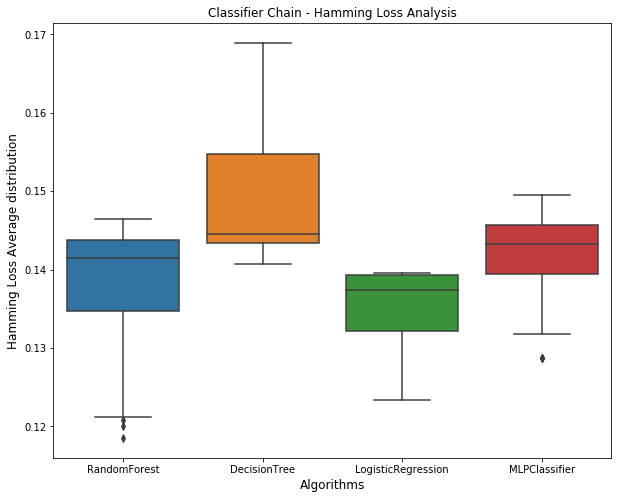

In [16]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='hamming_loss_avg',x='Algorithm',data=dataClassifier)
plt.ylabel("Hamming Loss Average distribution", size=12)
plt.xlabel("Algorithms",size=12)
plt.title("Classifier Chain - Hamming Loss Analysis", size=12)
plt.show()

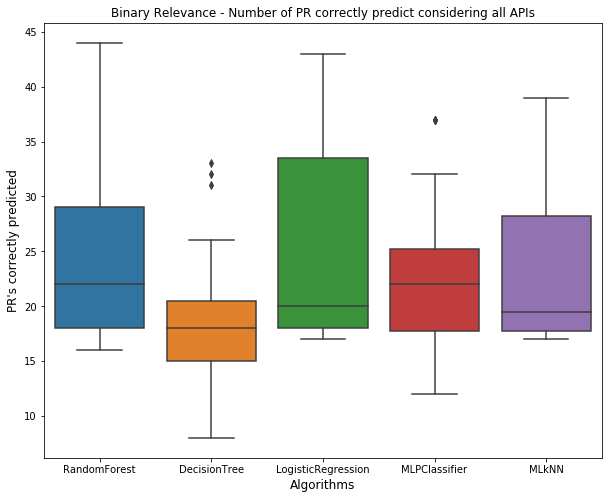

In [17]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='Accuracy_Score_not_normalized',x='Algorithm',data=dataBinary)
plt.ylabel("PR's correctly predicted", size=12)
plt.xlabel("Algorithms",size=12)
plt.title("Binary Relevance - Number of PR correctly predict considering all APIs", size=12)
plt.show()

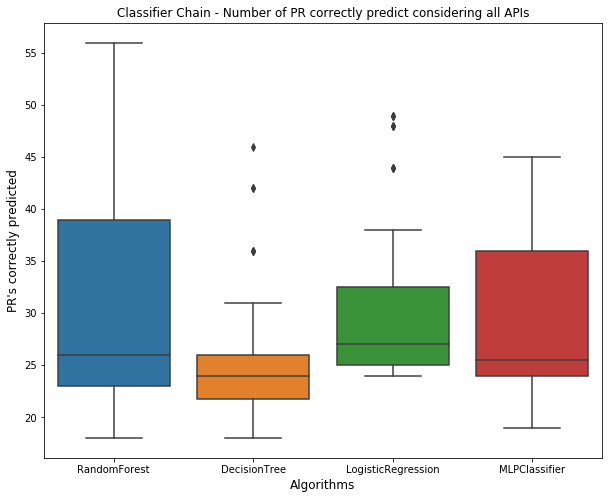

In [18]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='Accuracy_Score_not_normalized',x='Algorithm',data=dataClassifier)
plt.ylabel("PR's correctly predicted", size=12)
plt.xlabel("Algorithms",size=12)
plt.title("Classifier Chain - Number of PR correctly predict considering all APIs", size=12)
plt.show()


In [19]:
dataBinary.nlargest(10,['Precision','Fmeasure_Score'])

,date_time,tf-IDF,#_TopTerms,Stop_Word,Train/Test_Size,Algorithm,Accuracy_Score,Accuracy_Score_not_normalized,zero_one_loss,AUC-PR,hamming_loss_avg,Jaccard_samples,Jaccard_macro,Precision,Recall,Fmeasure_Score
129,2020-04-16 16:44:58.876057,"(1, 1)",500,Yes,0.2,LogisticRegression,0.117479,41,0.882521,0.592461,0.110315,0.386492,0.356383,0.668091,0.433056,0.525490
130,2020-04-16 16:45:03.233121,"(1, 1)",500,Yes,0.3,LogisticRegression,0.117479,41,0.882521,0.592461,0.110315,0.386492,0.356383,0.668091,0.433056,0.525490
131,2020-04-16 16:45:07.647909,"(1, 1)",500,Yes,0.4,LogisticRegression,0.117479,41,0.882521,0.592461,0.110315,0.386492,0.356383,0.668091,0.433056,0.525490
132,2020-04-16 16:45:13.037992,"(1, 1)",1000,Yes,0.2,LogisticRegression,0.114613,40,0.885387,0.596569,0.110315,0.390244,0.358819,0.665730,0.437673,0.528134
133,2020-04-16 16:45:18.349397,"(1, 1)",1000,Yes,0.3,LogisticRegression,0.114613,40,0.885387,0.596569,0.110315,0.390244,0.358819,0.665730,0.437673,0.528134
134,2020-04-16 16:45:23.713499,"(1, 1)",1000,Yes,0.4,LogisticRegression,0.114613,40,0.885387,0.596569,0.110315,0.390244,0.358819,0.665730,0.437673,0.528134
13,2020-04-16 16:30:15.235410,"(1, 1)",1000,Yes,0.3,RandomForest,0.111748,39,0.888252,0.576564,0.110185,0.402845,0.368657,0.657790,0.456140,0.538713
126,2020-04-16 16:44:47.108307,"(1, 1)",100,Yes,0.2,LogisticRegression,0.123209,43,0.876791,0.572573,0.110706,0.391659,0.364723,0.656797,0.450600,0.534502
127,2020-04-16 16:44:50.758925,"(1, 1)",100,Yes,0.3,LogisticRegression,0.123209,43,0.876791,0.572573,0.110706,0.391659,0.364723,0.656797,0.450600,0.534502
128,2020-04-16 16:44:54.460980,"(1, 1)",100,Yes,0.4,LogisticRegression,0.123209,43,0.876791,0.572573,0.110706,0.391659,0.364723,0.656797,0.450600,0.534502


In [20]:
dataClassifier.nlargest(10,['Precision','Fmeasure_Score'])

,date_time,tf-IDF,#_TopTerms,Stop_Word,Train/Test_Size,Algorithm,Accuracy_Score,Accuracy_Score_not_normalized,zero_one_loss,AUC-PR,hamming_loss_avg,Jaccard_samples,Jaccard_macro,Precision,Recall,Fmeasure_Score
129,2020-04-16 19:27:52.784702,"(1, 1)",500,Yes,0.2,LogisticRegression,0.140401,49,0.859599,0.529567,0.123339,0.231871,0.199493,0.702381,0.217913,0.332629
130,2020-04-16 19:27:57.167224,"(1, 1)",500,Yes,0.3,LogisticRegression,0.140401,49,0.859599,0.529567,0.123339,0.231871,0.199493,0.702381,0.217913,0.332629
131,2020-04-16 19:28:01.650839,"(1, 1)",500,Yes,0.4,LogisticRegression,0.140401,49,0.859599,0.529567,0.123339,0.231871,0.199493,0.702381,0.217913,0.332629
132,2020-04-16 19:28:06.908618,"(1, 1)",1000,Yes,0.2,LogisticRegression,0.137536,48,0.862464,0.522043,0.126986,0.202077,0.161651,0.701493,0.173592,0.278312
133,2020-04-16 19:28:12.278175,"(1, 1)",1000,Yes,0.3,LogisticRegression,0.137536,48,0.862464,0.522043,0.126986,0.202077,0.161651,0.701493,0.173592,0.278312
134,2020-04-16 19:28:17.671309,"(1, 1)",1000,Yes,0.4,LogisticRegression,0.137536,48,0.862464,0.522043,0.126986,0.202077,0.161651,0.701493,0.173592,0.278312
11,2020-04-16 18:53:48.864148,"(1, 1)",500,Yes,0.4,RandomForest,0.160458,56,0.839542,0.537748,0.118520,0.284050,0.249794,0.699769,0.279778,0.399736
13,2020-04-16 18:54:06.506629,"(1, 1)",1000,Yes,0.3,RandomForest,0.137536,48,0.862464,0.551026,0.120083,0.265225,0.235489,0.697789,0.262235,0.381208
14,2020-04-16 18:54:16.214170,"(1, 1)",1000,Yes,0.4,RandomForest,0.128940,45,0.871060,0.543308,0.121256,0.262033,0.229305,0.689055,0.255771,0.373064
123,2020-04-16 19:27:29.645959,"(1, 1)",50,Yes,0.2,LogisticRegression,0.108883,38,0.891117,0.517936,0.125033,0.216200,0.190556,0.686930,0.208680,0.320113


In [21]:
#Subsetting data to compute Stats

RF_binary = dataBinary[dataBinary.Algorithm == 'RandomForest']
RF_FMeasure = RF_binary['Fmeasure_Score']

LogisticRegression_binary = dataBinary[dataBinary.Algorithm == 'LogisticRegression']
LogisticRegression_FMeasure = LogisticRegression_binary['Fmeasure_Score']

MLPC_binary = dataBinary[dataBinary.Algorithm == 'MLPClassifier']
MLPC_FMeasure = MLPC_binary['Fmeasure_Score']

DT_binary = dataBinary[dataBinary.Algorithm == 'DecisionTree']
DT_FMeasure = DT_binary['Fmeasure_Score']

MlkNN_binary = dataBinary[dataBinary.Algorithm == 'MLkNN']
MlkNN_FMeasure = MlkNN_binary['Fmeasure_Score']




In [22]:
#### MANN-U Independent Samples
from scipy.stats import mannwhitneyu

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

##### Defining variables to be comparede

# compare samples
stat, p = mannwhitneyu(RF_FMeasure, LogisticRegression_FMeasure)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

   
#Effect_Size RandomForest Vs others   
print(cliffsDelta(RF_FMeasure, LogisticRegression_FMeasure))
print(cliffsDelta(RF_FMeasure, MLPC_FMeasure))
print(cliffsDelta(RF_FMeasure, DT_FMeasure))
print(cliffsDelta(RF_FMeasure, MlkNN_FMeasure)) #divisionByZero error

#Effect_Size LogisticRegression Vs others
print(cliffsDelta(LogisticRegression_FMeasure, MLPC_FMeasure))
print(cliffsDelta(LogisticRegression_FMeasure, DT_FMeasure))
print(cliffsDelta(LogisticRegression_FMeasure, MlkNN_FMeasure))

#Effect_Size MLPC Vs others
print(cliffsDelta(MLPC_FMeasure, DT_FMeasure))
print(cliffsDelta(MLPC_FMeasure, MlkNN_FMeasure))

#Effect_Size MlkNN Vs others
print(cliffsDelta(MlkNN_FMeasure,DT_FMeasure))


Statistics=1200.000, p=0.001
Different distribution (reject H0)
(-0.3333333333333333, 'medium')
(0.30666666666666664, 'small')
(0.6055555555555555, 'large')
(0.31666666666666665, 'small')
(0.59, 'large')
(0.7958333333333333, 'large')
(0.5775, 'large')
(0.29583333333333334, 'small')
(0.0125, 'negligible')
(0.2833333333333333, 'small')


In [23]:
#Effect_Size RandomForest Vs others   
print('Cohens d: %.3f' % cohend(RF_FMeasure, LogisticRegression_FMeasure))    
print('Cohens d: %.3f' % cohend(RF_FMeasure, MLPC_FMeasure))
print('Cohens d: %.3f' % cohend(RF_FMeasure, DT_FMeasure))
print('Cohens d: %.3f' % cohend(RF_FMeasure, MlkNN_FMeasure))

#Effect_Size LogisticRegression Vs others
print('Cohens d: %.3f' % cohend(LogisticRegression_FMeasure, MLPC_FMeasure))    
print('Cohens d: %.3f' % cohend(LogisticRegression_FMeasure, DT_FMeasure))    
print('Cohens d: %.3f' % cohend(LogisticRegression_FMeasure, MlkNN_FMeasure))    

#Effect_Size MLPC Vs others
print('Cohens d: %.3f' % cohend(MLPC_FMeasure, DT_FMeasure))    
print('Cohens d: %.3f' % cohend(MLPC_FMeasure, MlkNN_FMeasure))    

#Effect_Size MlkNN Vs others
print('Cohens d: %.3f' % cohend(MlkNN_FMeasure,DT_FMeasure))    

Cohens d: -0.467
Cohens d: 0.857
Cohens d: 1.256
Cohens d: 0.585
Cohens d: 1.239
Cohens d: 1.583
Cohens d: 0.869
Cohens d: 0.467
Cohens d: -0.053
Cohens d: 0.437


In [24]:
### Wilcoxon paired and dependent samples

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

#from scipy.stats import wilcoxon

#stat, p = wilcoxon(data1, data2)
#print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
#alpha = 0.05
#if p > alpha:
#	print('Same distribution (fail to reject H0)')
#else:
#	print('Different distribution (reject H0)')

In [25]:
##Kruskall Wallis - Group Comparison

#Fail to Reject H0: Paired sample distributions are equal.
#Reject H0: Paired sample distributions are not equal.
    
from scipy.stats import kruskal
# seed the random number generator


# compare samples
stat, p = kruskal(RF_FMeasure,LogisticRegression_FMeasure, MLPC_FMeasure,DT_FMeasure,MlkNN_FMeasure)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=77.035, p=0.000
Different distributions (reject H0)


In [26]:
#https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
from scipy.stats import friedmanchisquare

# compare samples
stat, p = friedmanchisquare(RF_FMeasure,LogisticRegression_FMeasure,MLPC_FMeasure,DT_FMeasure,MlkNN_FMeasure)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')


Statistics=76.940, p=0.000
Different distributions (reject H0)


In [208]:
###Precision analysis
#Subsetting data to compute Stats

RF_binary = dataBinary[dataBinary.Algorithm == 'RandomForest']
RF_Precision = RF_binary['Precision']

LogisticRegression_binary = dataBinary[dataBinary.Algorithm == 'LogisticRegression']
LogisticRegression_Precision = LogisticRegression_binary['Precision']

MLPC_binary = dataBinary[dataBinary.Algorithm == 'MLPClassifier']
MLPC_Precision = MLPC_binary['Precision']

DT_binary = dataBinary[dataBinary.Algorithm == 'DecisionTree']
DT_Precision = DT_binary['Precision']

MlkNN_binary = dataBinary[dataBinary.Algorithm == 'MLkNN']
MlkNN_Precision = MlkNN_binary['Precision']

In [209]:
#### MANN-U Independent Samples
from scipy.stats import mannwhitneyu

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

##### Defining variables to be comparede

# compare samples
stat, p = mannwhitneyu(RF_FMeasure, LogisticRegression_FMeasure)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

   
#Effect_Size RandomForest Vs others   
print(cliffsDelta(RF_Precision, LogisticRegression_Precision))
print(cliffsDelta(RF_Precision, MLPC_Precision))
print(cliffsDelta(RF_Precision, DT_Precision))
print(cliffsDelta(RF_Precision, MlkNN_Precision)) #divisionByZero error

#Effect_Size LogisticRegression Vs others
print(cliffsDelta(LogisticRegression_Precision, MLPC_Precision))
print(cliffsDelta(LogisticRegression_Precision, DT_Precision))
print(cliffsDelta(LogisticRegression_Precision, MlkNN_Precision))

#Effect_Size MLPC Vs others
print(cliffsDelta(MLPC_Precision, DT_Precision))
print(cliffsDelta(MLPC_Precision, MlkNN_Precision))

#Effect_Size MlkNN Vs others
print(cliffsDelta(MlkNN_Precision,DT_Precision))


Statistics=1200.000, p=0.001
Different distribution (reject H0)
(-0.6716666666666666, 'large')
(0.43, 'medium')
(0.48277777777777775, 'large')
(0.3566666666666667, 'medium')
(0.845, 'large')
(0.8425, 'large')
(0.8375, 'large')
(0.14583333333333334, 'negligible')
(-0.0075, 'negligible')
(0.10666666666666667, 'negligible')


In [210]:
##Kruskall Wallis - Group Comparison

#Fail to Reject H0: Paired sample distributions are equal.
#Reject H0: Paired sample distributions are not equal.
    
from scipy.stats import kruskal
# seed the random number generator


# compare samples
stat, p = kruskal(RF_Precision,LogisticRegression_Precision, MLPC_Precision,DT_Precision,MlkNN_Precision)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=111.411, p=0.000
Different distributions (reject H0)


In [211]:
#https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
from scipy.stats import friedmanchisquare

# compare samples
stat, p = friedmanchisquare(RF_Precision,LogisticRegression_Precision, MLPC_Precision,DT_Precision,MlkNN_Precision)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=143.664, p=0.000
Different distributions (reject H0)
